# Python入門(2)

- 関数
- クラス
- 入出力
- ライブラリ

## 関数

memo:  
Colabでインデントを下げるショートカットキーは ctrl+'}'

In [2]:
# 入力を行う関数

def input_number():
  while True:
    x = input('Enter positive number> ')
    try:
      x = float(x)
    except ValueError:
      print(f'{x}は数値に変換できません。')
      continue
    if x <= 0:
      print(f'{x}は正の数値ではありません。')
      continue
    break
  return x

In [3]:
# 平方根を求める関数

def square_root(x):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < 1.0E-3:
      break
  return rnew

In [4]:
# 全体の手順

x = input_number()
sq = square_root(x)
print(f'Square root of {x} is {sq}.')

Enter positive number> 2
Square root of 2.0 is 1.4142135623746899.


In [5]:
# デフォルト引数

def square_root(x, eps=1.0E-6):
  rnew = x
  while True:
    r1 = rnew
    r2 = x/r1
    rnew = (r1 + r2)/2
    if r1 - r2 < eps:
      break
  return rnew

In [8]:
# 引数1つで呼び出す

square_root(2)

1.414213562373095

In [9]:
# 仮引数の順に実引数を与えて呼び出す
square_root(2, 1.0E-2)

1.4142156862745097

In [10]:
# キーワード引数で呼び出す
square_root(2, eps=1.0E-6)

1.414213562373095

## クラス

In [11]:
# スタックの例

class MyStack():
  def __init__(self, data):
    self.num_list = data

  def push(self, elem):
    self.num_list.append(elem)

  def pop(self):
    if self.is_empty() == True:
      return None
    else:
      x = self.num_list[-1]
      self.num_list = self.num_list[:-1]
      return x

  def is_empty(self):
    return self.num_list == []

  def clear(self):
    self.num_list = []

if __name__ == '__main__':
  st = MyStack([5, 2, 3])
  print(st.pop())
  print(st.pop())
  st.push(8)
  st.push(9)
  print(st.pop())
  print(st.pop())
  print(st.pop())
  print(st.pop())

3
2
9
8
5
None


# 入出力


In [14]:
# ファイルの作成

data = ''', web, mobile, enterprise, embedded
Python, 80, 30, 90, 70
Java, 85, 60, 85, 40
C, 30, 40, 70, 90
'''

f = open('data.csv', 'w')
f.write(data)
f.close()

In [15]:
# ファイルの読み込みと表示

f = open('data.csv', 'r')
data = f.readlines()
for line in data:
  elems = line.split(',')
  for e in elems:
    print(f'{e:>12s}', end='')
f.close()

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


In [16]:
# withを用いたファイルの読み込みと表示

with open('data.csv', 'r') as f:
  data = f.readlines()
  for line in data:
    elems = line.split(',')
    for e in elems:
      print(f'{e:>12s}', end='')

                     web      mobile  enterprise   embedded
      Python          80          30          90         70
        Java          85          60          85         40
           C          30          40          70         90


## ライブラリ

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
%precision 3

'%.3f'

### numpy

In [21]:
# ベクトルや行列は ndarray で保持する

arr2 = np.array([[1.3, 2.5, 3.1], [4.0, 5.1, 6.9]])
print(arr2)
print('type: ', type(arr2))
print('ndim: ', arr2.ndim)
print('shape: ', arr2.shape)
print('dtype: ', arr2.dtype)

[[1.3 2.5 3.1]
 [4.  5.1 6.9]]
type:  <class 'numpy.ndarray'>
ndim:  2
shape:  (2, 3)
dtype:  float64


In [22]:
# 乱数（平均0、分散1の標準正規分布）で配列の初期値を与える
arr3 = np.random.randn(10)
print(arr3)

[-0.315 -2.237  0.032 -0.289  0.942  1.413 -1.214 -1.377 -0.022 -0.774]


In [23]:
# ブールインデックスを使った参照

arr3[arr3 > 0]

array([0.032, 0.942, 1.413])

In [24]:
# 行列計算

m1 = np.array([[1, 2], [3, 4]])
m2 = np.array([[5, 6], [7, 8]])

print('original:')
print(m1)
# 転置
print('transposed:')
print(m1.T)
# 逆行列
print('inverse:')
print(np.linalg.inv(m1))
# 対角要素
print('diag:')
print(np.diag(m1))
# 行列式
print('det:')
print(np.linalg.det(m1))
# 固有値
print('eigenvalues:')
print(np.linalg.eig(m1))
# 和
print('sum:')
print(m1 + m2)
# 積
print('product:')
print(m1 @ m2)

original:
[[1 2]
 [3 4]]
transposed:
[[1 3]
 [2 4]]
inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]
diag:
[1 4]
det:
-2.0000000000000004
eigenvalues:
(array([-0.372,  5.372]), array([[-0.825, -0.416],
       [ 0.566, -0.909]]))
sum:
[[ 6  8]
 [10 12]]
product:
[[19 22]
 [43 50]]


### matplotlib

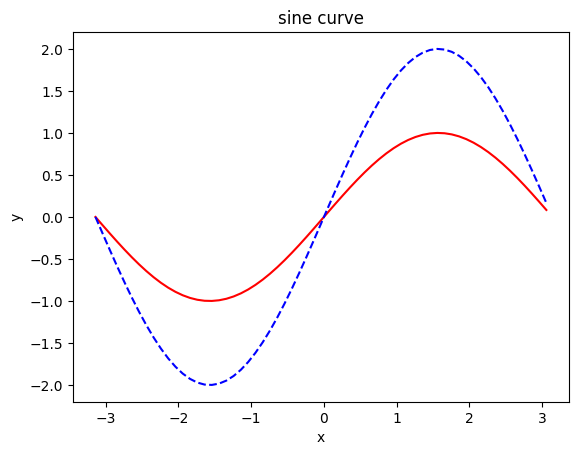

In [25]:
# 関数のプロット

import math
x = np.arange(-math.pi, math.pi, 0.1)
y = np.sin(x)
plt.title('sine curve')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, 'r-')
plt.plot(x, y*2, 'b--')

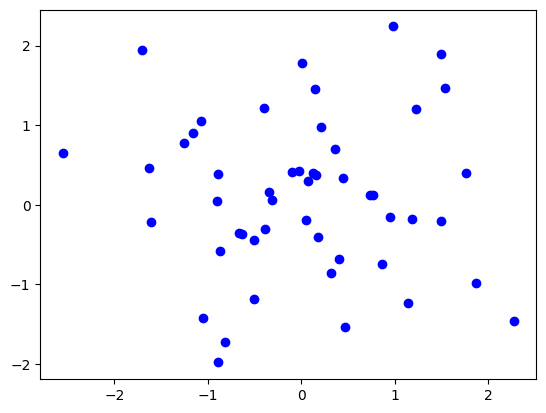

In [26]:
# 散布図

np.random.seed(0)
# 平均(0,0)、分散1の正規分布から2次元データを50個生成
data = np.random.randn(50, 2)
# マーカの色と形を指定して散布図で表示
plt.scatter(data[:,0], data[:,1], c='blue',marker='o')

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.046, -2.756, -2.466, -2.175, -1.885, -1.595, -1.304, -1.014,
        -0.724, -0.434, -0.143,  0.147,  0.437,  0.727,  1.018,  1.308,
         1.598,  1.889,  2.179,  2.469,  2.759]),
 <BarContainer object of 20 artists>)

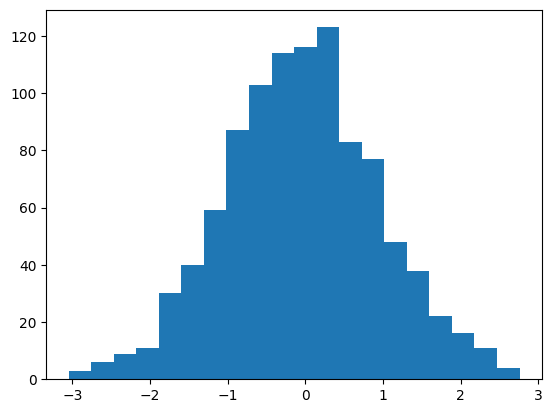

In [27]:
# ヒストグラム

np.random.seed(0)
# 平均0、分散1の正規分布から1次元データを1000個生成
data = np.random.randn(1000)
# データを20個のbinに分割して、度数・binの端の値を返し、グラフを表示
plt.hist(data, bins=20)